In [ ]:
from dataset import Corpus

data_dir = "/Users/jerryzhou/Downloads/TuringBench/AA"

In [21]:
import pandas as pd

df = pd.read_csv('~/Downloads/TuringBench/AA/train.csv')

In [22]:
label_counts = df['label'].value_counts()
label_counts

label
gpt2_pytorch    5964
pplm_gpt2       5964
xlnet_base      5964
xlm             5964
grover_base     5964
human           5964
pplm_distil     5964
gpt2_small      5507
fair_wmt19      5507
grover_large    5507
gpt3            5507
gpt2_large      5507
grover_mega     5507
gpt2_medium     5507
gpt2_xl         5402
gpt1            5402
fair_wmt20      5402
transfo_xl      5401
xlnet_large     5152
ctrl            5148
Name: count, dtype: int64

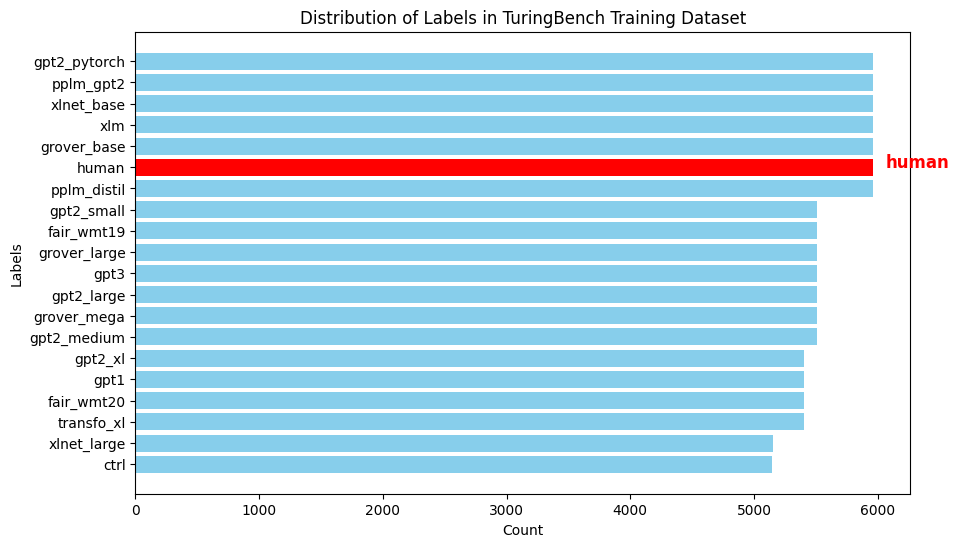

In [25]:
import matplotlib.pyplot as plt

label_data = {
    'label': list(label_counts.keys()),
    'count': label_counts.values
}

df_label = pd.DataFrame(label_data)

# Sorting by count for better visualization
df_label = df_label.sort_values(by="count", ascending=False)
# Plot distribution
plt.figure(figsize=(10, 6))
colors = ['red' if label == 'human' else 'skyblue' for label in df_label['label']]

plt.barh(df_label['label'], df_label['count'], color=colors)
plt.xlabel("Count")
plt.ylabel("Labels")
plt.title("Distribution of Labels in TuringBench Training Dataset")
plt.gca().invert_yaxis()  # Invert to have highest count on top

# Annotating the 'human' label with text
human_idx = df_label[df_label['label'] == 'human'].index[0]
plt.text(df_label.loc[human_idx, 'count'] + 100, human_idx, 'human', color='red', fontsize=12, fontweight='bold')

plt.show()

In [1]:
import torch
from transformers import RobertaTokenizer
from dataset import TuringBenchDataset
from torch.utils.data import DataLoader, DistributedSampler, RandomSampler

tokenizer = RobertaTokenizer.from_pretrained("/home/hice1/wzhou322/scratch/roberta-old-AI-detector")
ds = TuringBenchDataset('/home/hice1/wzhou322/scratch/TuringBench/AA/train.csv', tokenizer, max_sequence_length=512)
train_loader = DataLoader(ds, 64, sampler=RandomSampler(ds), num_workers=0)

/home/hice1/wzhou322/scratch/miniconda3/envs/ruler/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
human_counts = 0
for tokens, mask, label in train_loader:
    human_counts += torch.sum(label)
print(human_counts)
print(len(ds))

tensor(5964)
78353


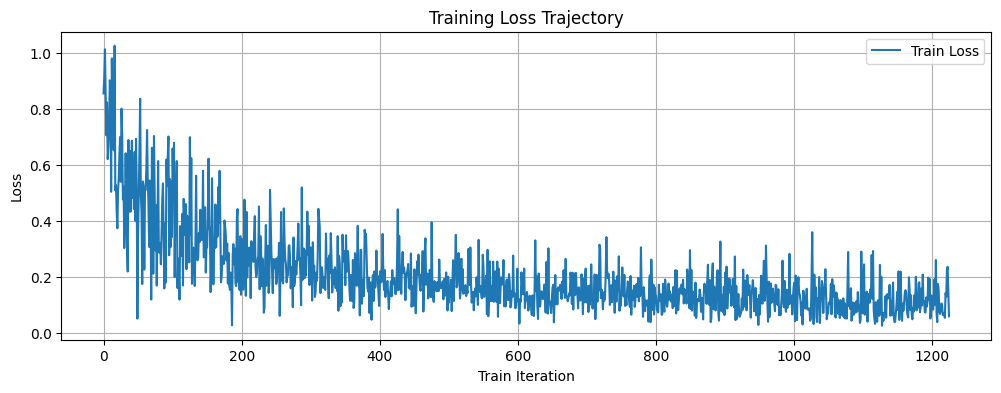

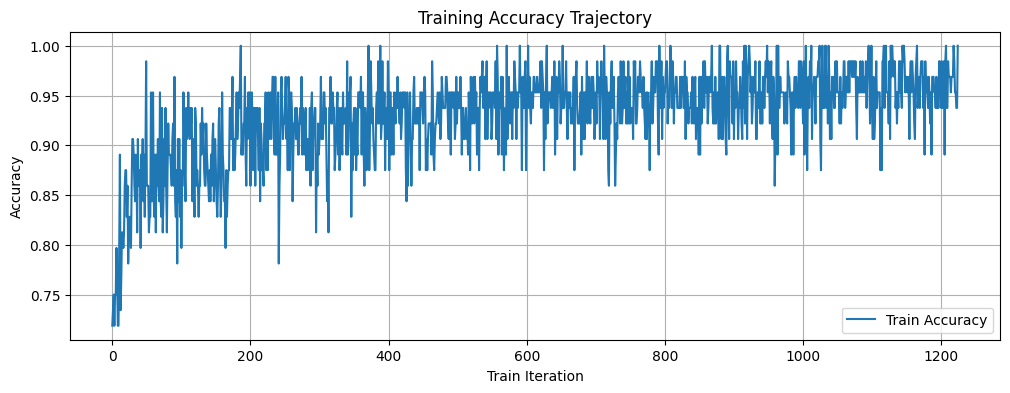

In [4]:
import torch
import matplotlib.pyplot as plt

# Load the data
train_losses = torch.load("/home/hice1/wzhou322/scratch/AI_text_detection_KO/train_losses.pt")
train_accs = torch.load("/home/hice1/wzhou322/scratch/AI_text_detection_KO/train_accs.pt")

# Plot training loss trajectory
plt.figure(figsize=(12, 4))
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Train Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Trajectory')
plt.legend()
plt.grid(True)
plt.show()

# Plot training accuracy trajectory
plt.figure(figsize=(12, 4))
plt.plot(train_accs, label='Train Accuracy')
plt.xlabel('Train Iteration')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Trajectory')
plt.legend()
plt.grid(True)
plt.show()